# Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [55]:
fifa = pd.read_csv('data/fifa_data.csv')

In [53]:
display(fifa.head(5))

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Histograms

[40, 50, 60, 70, 80, 90, 100]


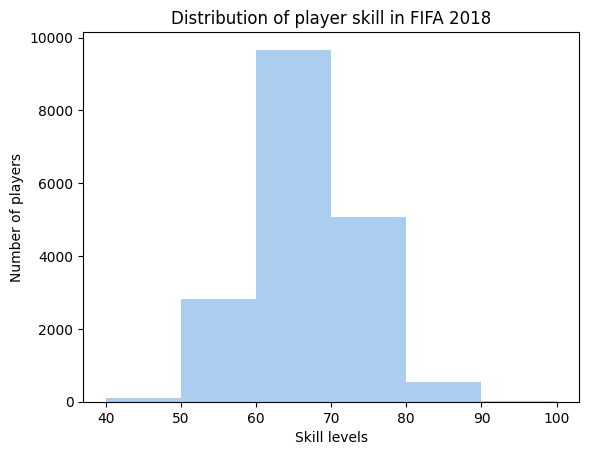

In [22]:
bins = list(range(40,110,10))
print(bins)
plt.hist(fifa.Overall, bins = bins, color='#abcdef')
plt.xticks(bins)
plt.ylabel('Number of players')
plt.xlabel('Skill levels')

plt.title('Distribution of player skill in FIFA 2018')
plt.show()

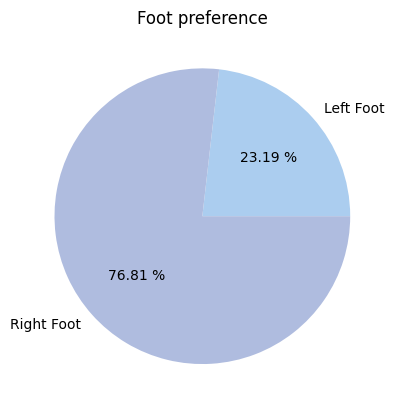

In [35]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
labels = ['Left Foot', 'Right Foot']
colors = ['#abcdef', '#afbcdf']
plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f %%')
plt.title('Foot preference')

plt.show()

In [56]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
fifa.Weight = round(fifa.Weight * 0.45359237, 2)



0        72.12
1        83.01
2        68.04
3        76.20
4        69.85
         ...  
18202    60.78
18203    77.11
18204    67.13
18205    69.85
18206    79.83
Name: Weight, Length: 18207, dtype: float64

In [67]:
display(fifa.Weight)
light = fifa.loc[fifa.Weight < 60].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 60) & (fifa.Weight < 68)].count()[0]
medium = fifa.loc[(fifa.Weight >= 68) & (fifa.Weight < 75)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 75) & (fifa.Weight < 90)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 90)].count()[0]

0        72.12
1        83.01
2        68.04
3        76.20
4        69.85
         ...  
18202    60.78
18203    77.11
18204    67.13
18205    69.85
18206    79.83
Name: Weight, Length: 18207, dtype: float64

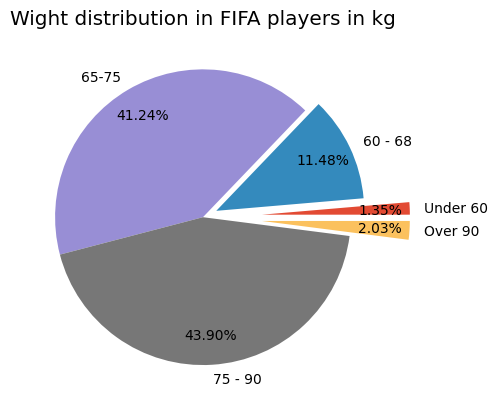

In [76]:
weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 60', '60 - 68', '65-75', '75 - 90', 'Over 90']
plt.style.use('ggplot')
explode = (.4,.1,0,0,.4)
plt.pie(weights, labels = labels, autopct='%.2f%%', pctdistance=0.8, explode=explode)
plt.title('Wight distribution in FIFA players in kg')
plt.show()

In [94]:
fifa.Club[22:32]

22      FC Bayern München
23        Manchester City
24               Juventus
25    Paris Saint-Germain
26              Liverpool
27            Real Madrid
28      FC Bayern München
29                 Napoli
30            Real Madrid
31      Tottenham Hotspur
Name: Club, dtype: object

## Box and whiskers

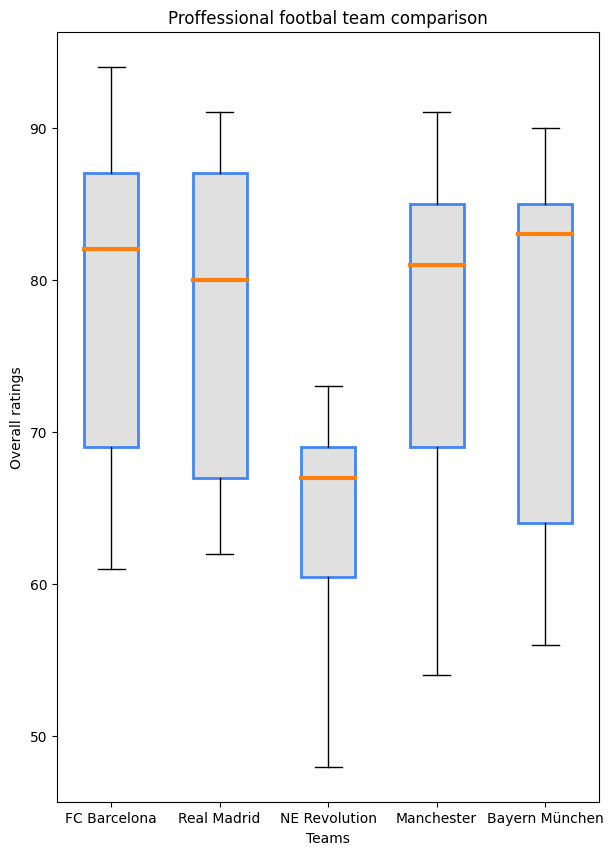

In [109]:
plt.style.use('default')
plt.figure(figsize=(7,10))
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
manchester = fifa.loc[fifa.Club == 'Manchester City']['Overall']
bayern = fifa.loc[fifa.Club == 'FC Bayern München']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'NE Revolution', 'Manchester', 'Bayern München']


plt.title('Proffessional footbal team comparison')
boxes = plt.boxplot([barcelona, madrid, revs, manchester, bayern], labels = labels, patch_artist=True, medianprops={'linewidth':3})
for box in boxes['boxes']:
    #set edge colour
    box.set(color='#4286f4', linewidth=2)
    
    #set fill colour
    box.set(facecolor='#e0e0e0')
plt.ylabel('Overall ratings')
plt.xlabel('Teams')
plt.show()
